In [260]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [261]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
tc = torch.tensor(t_c)
tu = torch.tensor(t_u)
tun = tu * 0.1

In [262]:
def model(tu, w2, w1, b):
  return w2 * tu**2 + w1 * tu + b

def model1(tu, w1, b):
  return w1 * tu + b

def lossf(tp, tc):
  squared_diff = (tp-tc)**2
  return squared_diff.mean()

In [263]:
#w1 = torch.ones(())
#w2 = torch.ones(())
#b = torch.zeros(())
#tp = model(tu, w2, w1, b)
#tp

In [264]:
prm = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
loss = lossf(model(tu, *prm), tc)
loss.backward()
prm.grad

tensor([2.3149e+07, 3.6181e+05, 5.9642e+03])

In [265]:
prm1 = torch.tensor([1.0, 0.0], requires_grad=True)
loss1 = lossf(model1(tu, *prm1), tc)
loss1.backward()
prm1.grad

tensor([4517.2969,   82.6000])

In [266]:
def training_loop(n_epochs, learning_rate, prm, tu, tc):
  for epoch in range(1, n_epochs + 1):
    if prm.grad is not None:
      prm.grad.zero_()
    tpc = model(tu, *prm)
    loss = lossf(tpc, tc)
    loss.backward()
    with torch.no_grad():
      prm -= learning_rate * prm.grad
    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return prm, tpc

In [267]:
def training_loop1(n_epochs, learning_rate, prm1, tu, tc):
  for epoch in range(1, n_epochs + 1):
    if prm1.grad is not None:
      prm1.grad.zero_()
    tpl = model1(tun, *prm1)
    loss1 = lossf(tpl, tc)
    loss1.backward()
    with torch.no_grad():
      prm1 -= learning_rate * prm1.grad
    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss1)))
  return prm1, tpl

In [268]:
ac, bc = training_loop(
              n_epochs=5000,
              learning_rate=1e-4,
              prm = torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
              tu = tun,
              tc = tc
              )

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


In [269]:
al, bl = training_loop1(
              n_epochs=5000,
              learning_rate=1e-2,
              prm1 = torch.tensor([1.0, 0.0], requires_grad=True),
              tu = tun,
              tc = tc
              )

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


In [270]:
bl

tensor([ 1.8593, 12.7008, 13.9352, 26.6552, 12.9155,  8.9439,  0.8932, -5.6009,
         8.6755, 15.1160, 19.4097], grad_fn=<AddBackward0>)

In [271]:
%matplotlib inline
from matplotlib import pyplot as plt

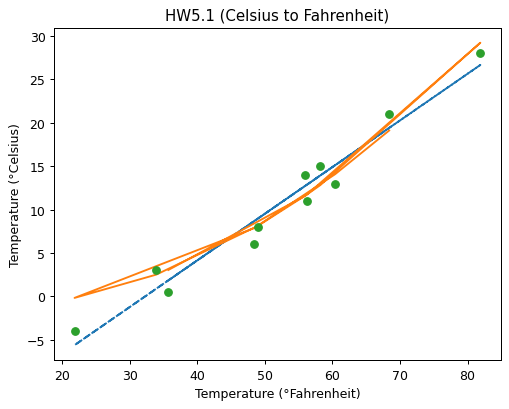

In [288]:
fig = plt.figure(dpi=90)
plt.title("HW5.1 (Celsius to Fahrenheit)")
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(tu.numpy(), bl.detach().numpy(),'--')
plt.plot(tu.numpy(), bc.detach().numpy())
plt.plot(tu.numpy(), tc.numpy(), 'o')